## **Relationship of the mortality rate to health data of patients on dialysis facilities **

Data Story Project for Data Science Career Track bootcamp

 Benhur Tedros

## Summary

Kidney failure (ESRD: end stage renal disease) is one of the leading cause of death in the United States. According to USRDS 2013 Annual data report, this disease affects almost 650,000 people per year in US, and its rate is increasing by 5% each year. Today, ESRD patients have two treament options, which are either kidney transplantation or dialysis. The best current treament is the transplantation; however, the number of kidney donors to ESRD patients ratio is 1 to 6. Moreover, the need for kidney is increasing at 8% per year while their availability has not grown to match up that number. Therefore, dialysis is the only alternative option that the patients on waiting list have. People undergoing dialysis often have multiple health concerns,which can have an adverse impact on their life expectancy, though dialysis may offer a better quality of life. According to the National Institute of Diabetes and Digestive and Kidney Diseases report, the two-year, five year and ten-year survival rates are around 64%, 33%, and 10% respectively. The question here is that "could we find any meaningful pattern in mortality rate from other health data of the patients collected during their visits to dialysis facilities or from the type of practices used in the facilities?" For example, would the effect be better if the facility use hemodialysis for patient A and peritoneal dialysis for patient B or vice versa.

There are several dialysis facilities registered with Medicare in the country where patients often visit. Besides the importance of the quality of care they provide, additional health data of their patients is collected.  Some of the data include mortality rate (deaths), hospitalizations, blood transfusions, incidents of hypercalcemia (too much calcium in the blood), percentage of waste removed during hemodialysis in adults and children, percentage of waste removed in adults during peritoneal dialysis, percentage of AV fistulas, percentage of catheters in use over 90 days and others. However, no reports were found that shows a relationship pattern of mortality rate based on the other health data listed above. What does the relationship between the mortality rate and the the health data of the patients on dialysis look like?


## Hypothesis:

Some of the health data such as readmission rate, hospitalization rate, standard infection rate are expected to show a positive relationship to mortality rate. Different results can happen when we to try to predict the mortality rate from the other health data. The higher or lower values of each field will define the mortality rate pattern in positive or negative way respectively. For example, patients with arteriovenous_fistulae in most cases has a lower risk of infection than patients with catheters, and so does their mortality rate.


## Methods/Approach

This project will be treated as a supervised learning problem.  The following libraries will be used for data loading, wrangling, cleaning, feature selection, matrix manipulation, data visualization, classifier models, model evaluation etc. 

•	pandas

•	numpy

•	matplotlib

•	scikit-learn


## Data Wrangling and Cleaning

The data is stored in MS Excel spreadsheet in CSV format, which was easily loaded into pandas dataframes.

In [1]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [2]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project')

In [3]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

In [4]:
# # Getting information on the data fields, attributes,data types,field names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 98 columns):
Provider Number                                                                              6810 non-null object
Network                                                                                      6810 non-null int64
Facility Name                                                                                6810 non-null object
Five Star Date                                                                               6810 non-null object
Five Star                                                                                    6017 non-null float64
Five Star Data Availability Code                                                             6810 non-null int64
Address Line 1                                                                               6810 non-null object
Address Line 2                                                                               101

The data has 6810 observations with 98 data fields with some null values. Many of the names of the features are too long and it is helpful to shorten them for convenience. The features which are needed for the prediction are renamed.

### I) Feature Selection

As it can be seen in the above table, the dataset contains some non-scalable and categorical variables/ non-numerical labels (such as facility name, location, addresses and others). The non-scalable data fields were dropped, and the others with the categorical variables were converted into numerical variables in order not to miss important information from those attributes. 

Fifty data fields/features were selected to be utilized in the model prediction.

In [5]:
# Subsetting the features needed for the prediction
feature_select = pd.DataFrame(data.iloc[:,[0,1,4,9,10,13,14,16,17,18,19,20,25,27,29,32,33,36,38,39,40,41,42,
                                           43,44,46,48,49,51,52,53,54,55,57,58,59,60,61,71,72,73,74,77,80,84,85,86,87,91,94]])

In [6]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Provider Number':'Provider_num','Profit or Non-Profit':'Profit_YesNo','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Number of Dialysis Patients with Hgb data':'HgbPatient_num','Number of patients included in the transfusion summary':
                                      'Transfus_patientNum','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Number of Adult HD patients with Kt/V data':'Kt/VPatient_Num','Number of Adult HD patient-months with Kt/V data':'Kt/VPatient_MonthNum',
                                      'Number of Adult PD patients with Kt/V data':'PD_Patient_Kt/V_Num','Number of Pediatric HD patient-months with Kt/V data':
                                      'Kt/V-HDPediatric_MonthNum','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Number of Adult patients included in arterial venous fistula and catheter summaries':'NumPat_AVFC',
                                      'Number of Adult patient-months included in arterial venous fistula and catheter summaries':'NumPat-Mon_AVFC',
                                      'Number of patients in hypercalcemia summary':'NumPat_HypercalcemiaSum','Number of patient-months in hypercalcemia summary':
                                      'NumPat-Mon_HypercalcSum','Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Number of patients in Serum phosphorus summary':'NumPat_SerumPhos','Number of patient-months in Serum phosphorus summary ':'NumPat-Mon_SerumPhos',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Number of patients included in hospitalization summary':'NumPat_Hospit','Number of hospitalizations included in hospital readmission summary':
                                      'NumHospt_Hospt-Readmit','Number of patients included in survival summary':'NumPat_Survival',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate','Number of pediatric PD patients with Kt/V data':
                                      'NumPediat-PD_Kt/V','Number of pediatric PD patient-months with KT/V data':'NumPediat-PDMon_Kt/V',
                                      'Percentage of pediatric PD patients with Kt/V>=1.8':'PD_Pediat_Kt/V>=1.8', 'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 



In [7]:
## regrouping the columns to line up the predictor variables together and 
# move the mortality rate(the response variable) to the last column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(94, cols.pop(cols.index('Mortality_rate')))

# To reorder the columns
features_all = features_all.ix[:, cols]


In [8]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['Chain Owned']=numeric.fit_transform(features_all['Chain Owned'].astype('str'))
features_all['Late Shift']=numeric.fit_transform(features_all['Late Shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['hemoTrain_home']=numeric.fit_transform(features_all['hemoTrain_home'].astype('str'))

features_all.head()

,Provider_num,Network,Five Star,State,Zip,Profit_YesNo,Chain Owned,Late Shift,Dial_Stations,hemodial_incenter,...,NumPat_Survival,Readmission_rate,Hospitalization_rate,NumPediat-PD_Kt/V,NumPediat-PDMon_Kt/V,PD_Pediat_Kt/V>=1.8,PD_Pat_Kt/V>=1.7,Infection_ratio,Transfusion_rate,Mortality_rate
0,312661,3,NaN,NJ,8753,1,1,0,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,672773,14,NaN,TX,77015,1,1,0,12,1,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,232712,11,NaN,MI,48021,1,1,0,24,1,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,152669,9,NaN,IN,46319,1,1,0,12,1,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,32504,15,NaN,AZ,85251,1,1,0,8,0,...,132.0,NaN,105.6,0.0,0.0,NaN,NaN,NaN,NaN,13.0


In [9]:
# There are some null values in the response variable,Mortality rate, and the null/missing values are dropped.
mortality_na=features_all.dropna(subset=['Mortality_rate'],how='any')
mortality_na.tail()

,Provider_num,Network,Five Star,State,Zip,Profit_YesNo,Chain Owned,Late Shift,Dial_Stations,hemodial_incenter,...,NumPat_Survival,Readmission_rate,Hospitalization_rate,NumPediat-PD_Kt/V,NumPediat-PDMon_Kt/V,PD_Pediat_Kt/V>=1.8,PD_Pat_Kt/V>=1.7,Infection_ratio,Transfusion_rate,Mortality_rate
6804,532504,15,3.0,WY,82601,1,1,0,12,1,...,332.0,13.7,160.4,0.0,0.0,NaN,81.0,0.00,17.6,16.2
6805,362568,9,3.0,OH,44142,1,1,0,24,1,...,619.0,22.6,165.7,0.0,0.0,NaN,NaN,0.25,33.4,14.7
6806,312615,3,4.0,NJ,7607,1,1,1,36,1,...,1121.0,27.3,164.8,1.0,12.0,NaN,86.0,0.98,35.0,15.3
6807,292548,15,2.0,NV,89129,0,1,0,24,1,...,539.0,27.9,200.1,0.0,0.0,NaN,83.0,0.44,45.1,18.9
6808,362770,9,3.0,OH,45638,1,1,0,16,1,...,286.0,26.1,203.6,0.0,0.0,NaN,NaN,0.39,144.0,15.3


In [10]:
# Let us find out the percentile of the mortality rate which will be converted into
# catagorical varibales of low, medium and high mortality rates
mortality_na['Mortality_rate'].describe()

count    6140.000000
mean       17.554723
std         4.946509
min         0.000000
25%        14.500000
50%        17.200000
75%        20.025000
max        66.400000
Name: Mortality_rate, dtype: float64

In [11]:
# Assigning the categoricable variable based on their percentile values

mortality_na['Mort_category'] = 'very low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 0) & (mortality_na['Mortality_rate'] < 14.50)] = 'very low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 14.50) & (mortality_na['Mortality_rate'] < 17.20)] = 'low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 17.20) & (mortality_na['Mortality_rate'] < 20.025)] = 'medium'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 20.025) & (mortality_na['Mortality_rate'] < 30.00)] = 'high'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 30.00) & (mortality_na['Mortality_rate'] < 67)] = 'very high'

mortality_na.head(2)


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\benbahtin\A

,Provider_num,Network,Five Star,State,Zip,Profit_YesNo,Chain Owned,Late Shift,Dial_Stations,hemodial_incenter,...,Readmission_rate,Hospitalization_rate,NumPediat-PD_Kt/V,NumPediat-PDMon_Kt/V,PD_Pediat_Kt/V>=1.8,PD_Pat_Kt/V>=1.7,Infection_ratio,Transfusion_rate,Mortality_rate,Mort_category
4,32504,15,NaN,AZ,85251,1,1,0,8,0,...,NaN,105.6,0.0,0.0,NaN,NaN,NaN,NaN,13.0,very low
65,192578,13,NaN,LA,70394,1,0,0,8,1,...,NaN,65.9,0.0,0.0,NaN,NaN,NaN,NaN,17.4,medium


In [12]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

mortality_na[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2','HD_Pediatric_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= mortality_na[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2','HD_Pediatric_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')

C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
mortality_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6140 entries, 4 to 6808
Data columns (total 51 columns):
Provider_num                                        6140 non-null object
Network                                             6140 non-null int64
Five Star                                           5939 non-null float64
State                                               6140 non-null object
Zip                                                 6140 non-null int64
Profit_YesNo                                        6140 non-null int64
Chain Owned                                         6140 non-null int64
Late Shift                                          6140 non-null int64
Dial_Stations                                       6140 non-null int64
hemodial_incenter                                   6140 non-null int64
perit_incenter                                      6140 non-null int64
hemoTrain_home                                      6140 non-null int64
Medicare_Patient_Hgb<10  

 The dataset was cleaned and subset into 6140 observations and 51 data fields (49 features and 2 response variables). The "Mortality rate" columns[in continuous and categorical nature] is our field of interest. The dataset is now ready for exploratory analysis and prediction.

## Explaratory Data Analysis (EDA) and Discussions

Explaratory data analysis for this dataset is useful in determining relationships among the explanatory variables, preliminary selection of appropriate models and assessing the direction and rough size of relationships between explanatory and outcome variables. Before hand, it is vital to see the mortality rate in the facilities across the States. To explore the distribution, the mean and median of the mortality rate across the States were ploted.

In [14]:
# To explore the distribution and variance of the mortality rate through out the States,
# it is good to find the mean and median of the mortality rate on State basis. 

mort_state = mortality_na.groupby('State',as_index=True)['Mortality_rate'].agg(['mean', 'median'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')

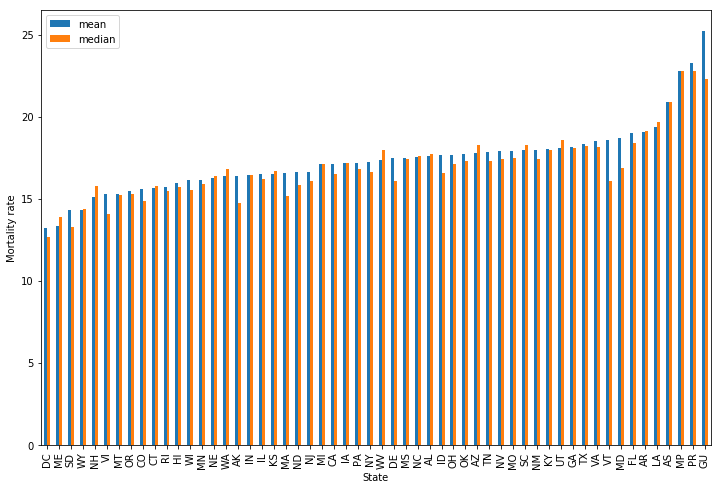

In [15]:
# Ploting the mean of the mortality rate against the States
mort_state.plot.bar(figsize=(12,8)).set_ylabel('Mortality rate')

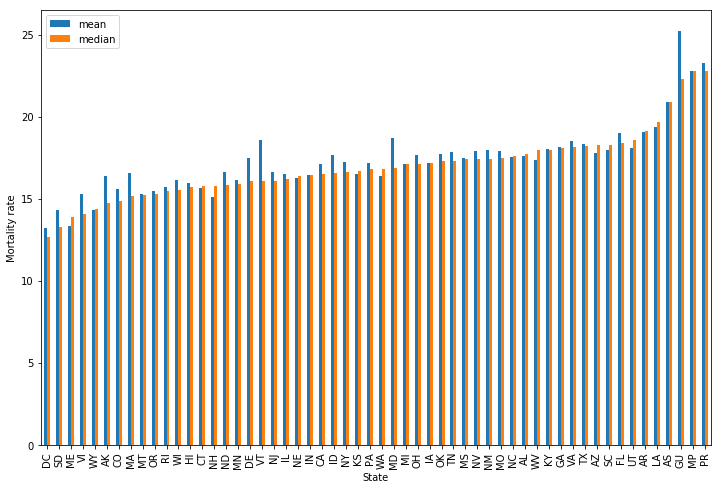

In [16]:
# Ploting the median of the mortality rate against the States
mort_state1.plot.bar(figsize=(12,8)).set_ylabel('Mortality rate')

These plots show that the mean and median of the mortality rate across the States donot coincide. This can tell us that the mortality rate distribution looks like asymmetric in some of the States. This means that the difference in mortality rate of some dialysis facilities within one State may be higher. For example, the States DC, SD, VI, AK, NJ, DE, GU, MI, VT, MD show relatively significant difference in the mean and median of the mortality rate.Higher mortality rate is observed in the States of AS, GU, MP and PR, while the mortality rate in DC, SD, ME, VI holds a lower values. 

How about the relationship of mortality rate to the other health data look like? To answer this, ploting all the features against the response variable is helpful to explore their relationship pattern. The following plots explore the trend of the mortality rate  against several variables of the patients' health data.

#### Plot-1

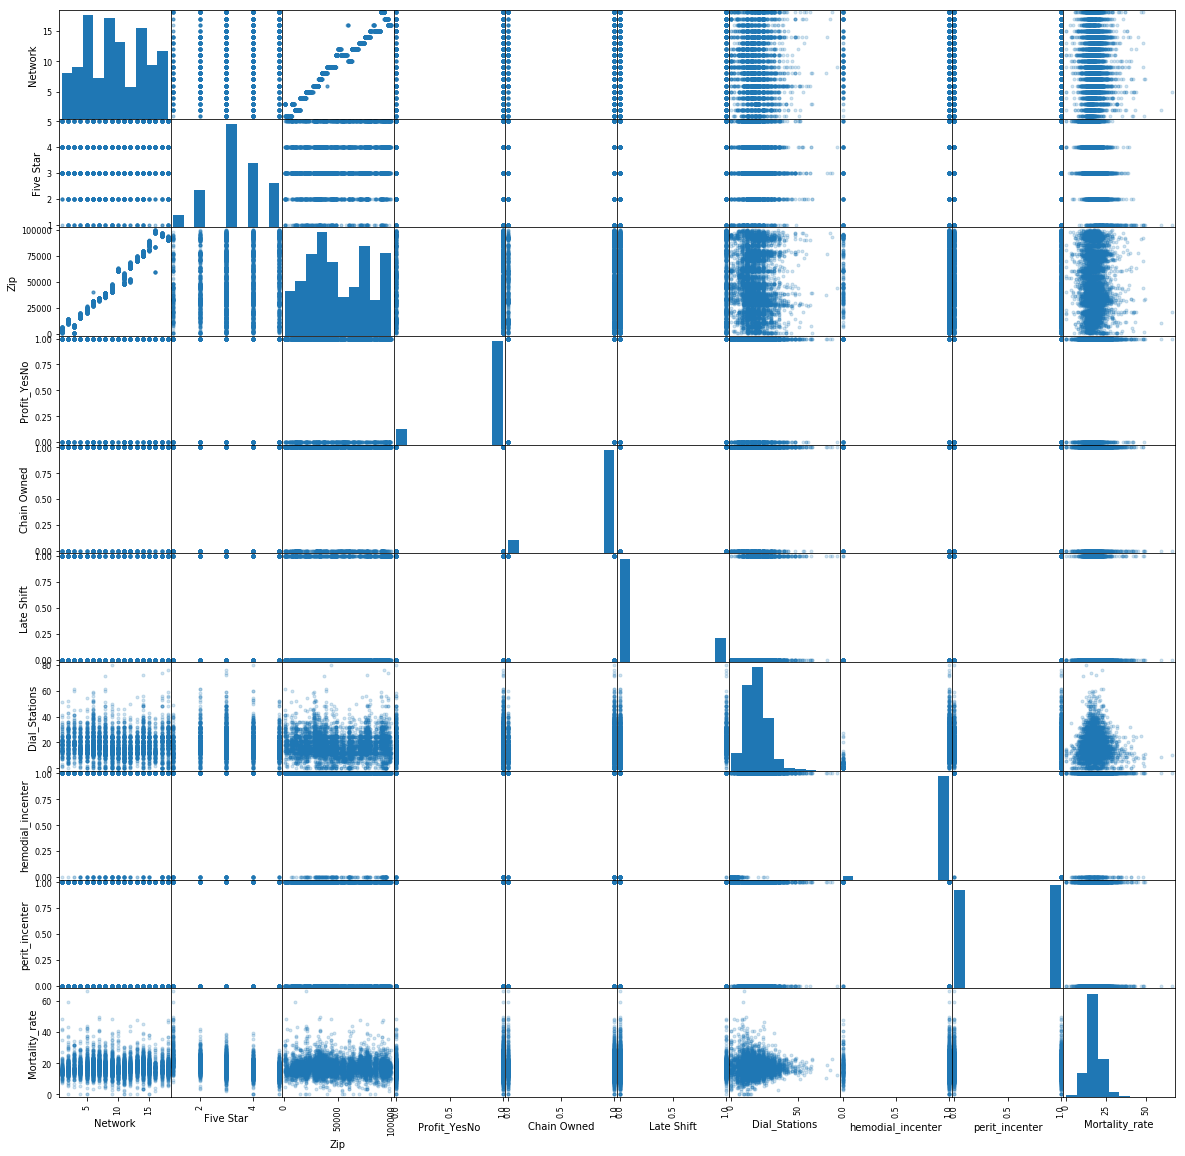

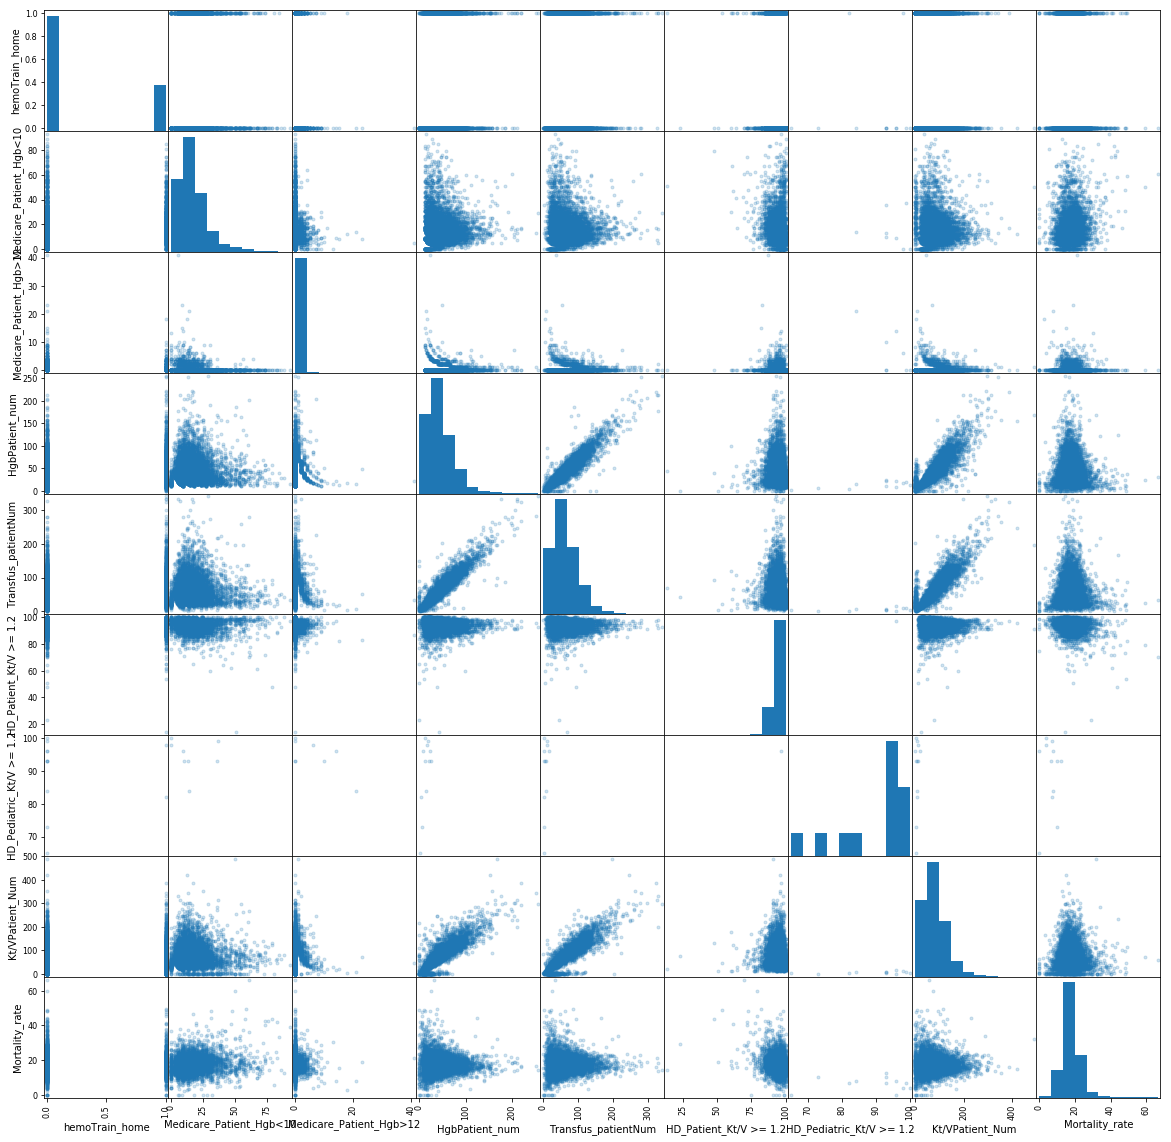

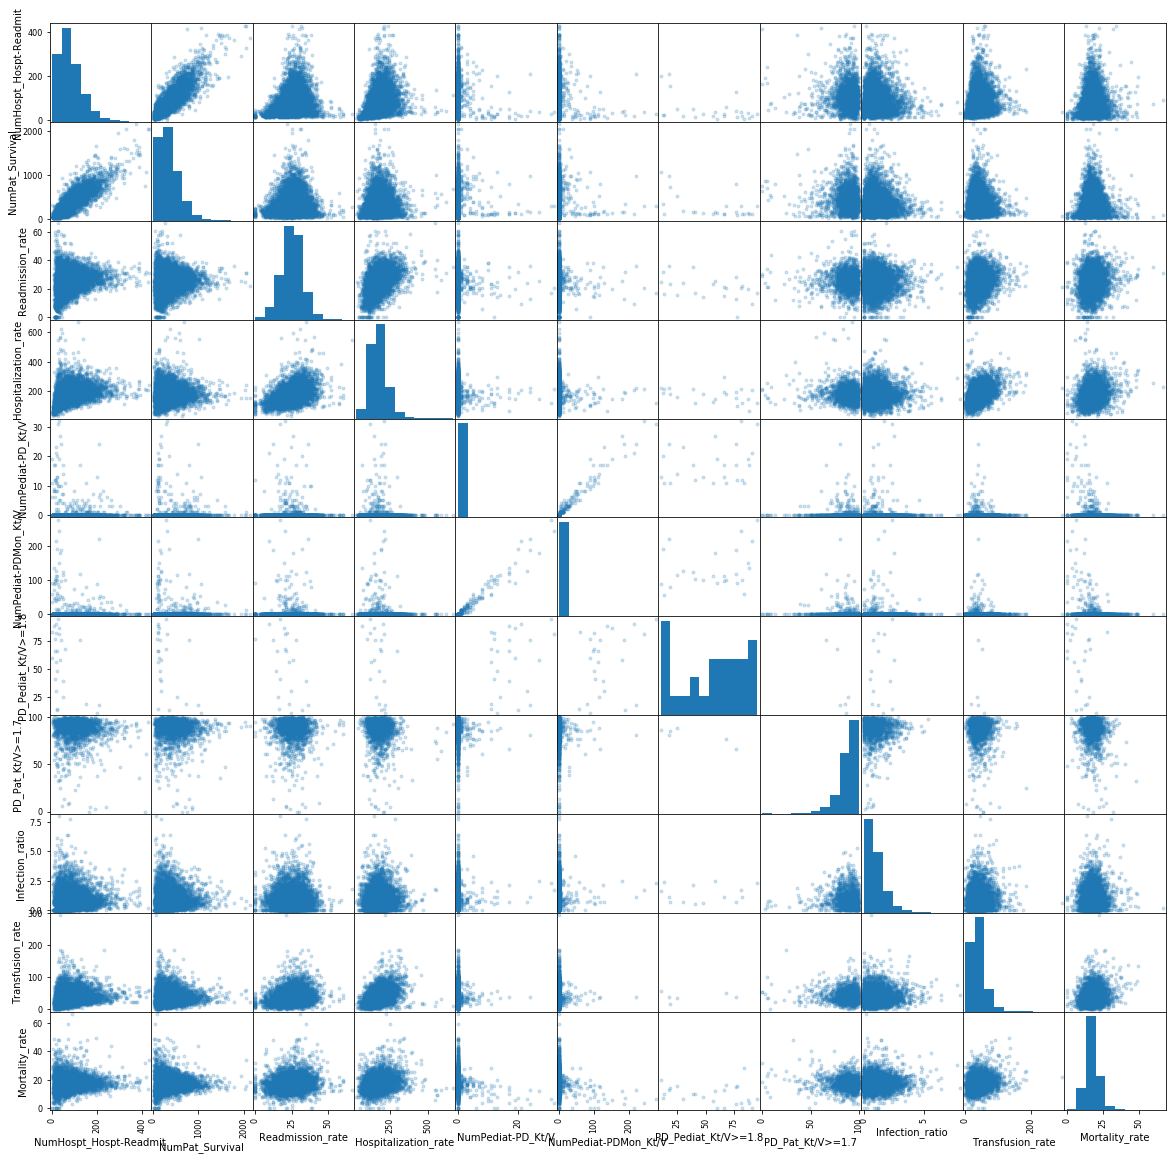

In [17]:
# Exploring the features and their relationship pattern among each other 

from pandas.tools.plotting import scatter_matrix

test = mortality_na.iloc[:, np.r_[0:11,49]]
test = scatter_matrix(test, alpha=0.2, figsize=(20, 20), diagonal='hist')

test1 = mortality_na.iloc[:, np.r_[11:19,49]]
test1 = scatter_matrix(test1, alpha=0.2, figsize=(20, 20), diagonal='hist')


test4 = mortality_na.iloc[:, np.r_[39:49,49]]
test4 = scatter_matrix(test4, alpha=0.2, figsize=(20, 20), diagonal='hist')


The above plots shows that the trend of the mortality rate varies from one feature to another. For example, the mortality rate indicate an increasing trend with hospitalization, readmission and tranfusion rates, while infection ratio seem to show not strong trend with the mortality rate. Some of the features also did not depict any trend in mortality rates. To use the scatter plot to display some of features such as five star (ranges from 0 to 5) was not good enough. For the five star field, a bar plot would be better. As it is displayed below, the bar plot described the relationship between the two variables. As expected, the better the facilities are the lower the mortality rate.

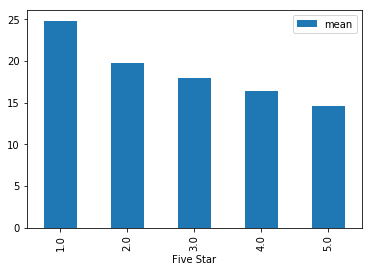

In [18]:
# Exploring the mortality rate against the Five star reviews

five=mortality_na.iloc[:, np.r_[2,49]]
star = five.groupby('Five Star',as_index=True)['Mortality_rate'].agg(['mean'])
star.plot.bar()

#### Plot-2

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

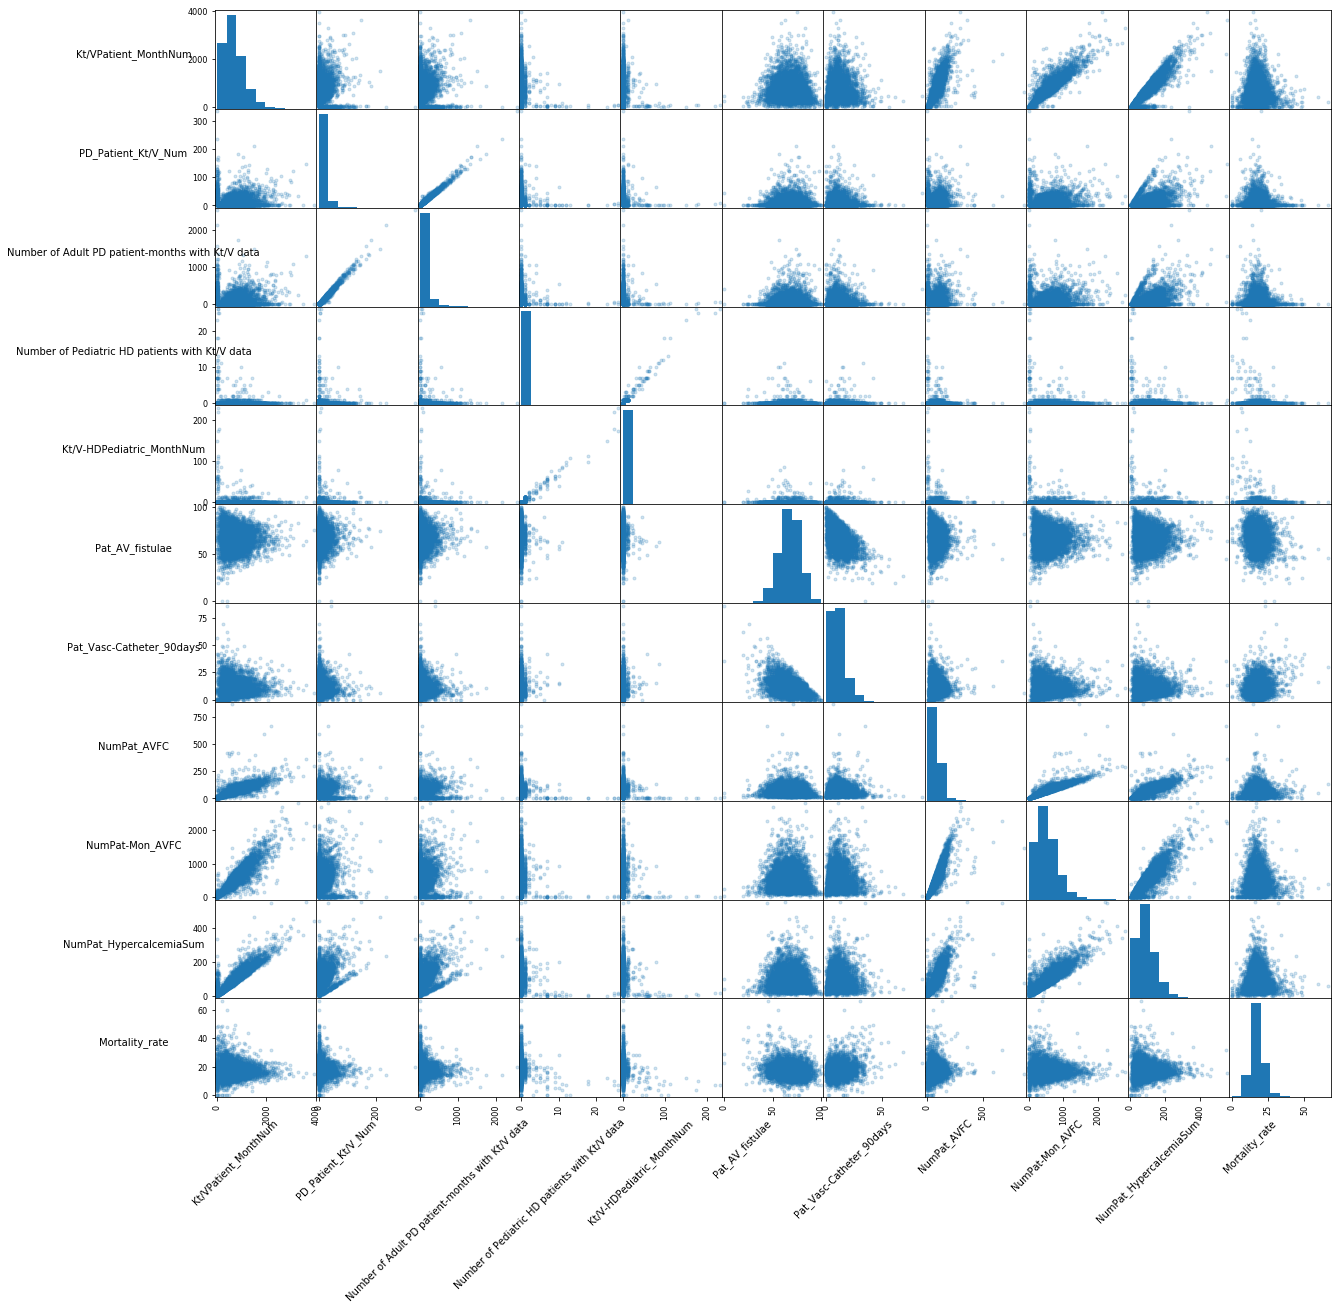

In [19]:
test2 = mortality_na.iloc[:, np.r_[19:29,49]]
test2 = scatter_matrix(test2, alpha=0.2, figsize=(20, 20), diagonal='hist')

#Change label rotation
[ax.xaxis.label.set_rotation(45) for ax in test2.reshape(-1)]
[ax.yaxis.label.set_rotation(0) for ax in test2.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
([ax.get_yaxis().set_label_coords(-0.8,0.5) for ax in test2.reshape(-1)])
([ax.get_xaxis().set_label_coords(0.2,-0.2) for ax in test2.reshape(-1)])

Based the above plot-2, the mortality rate shows a clear increasing trend when the percentage of patients with vascular catheter in use for 90 days or longer increases. Other features did not indicate any trend with the mortality rate.

#### Plot-3

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

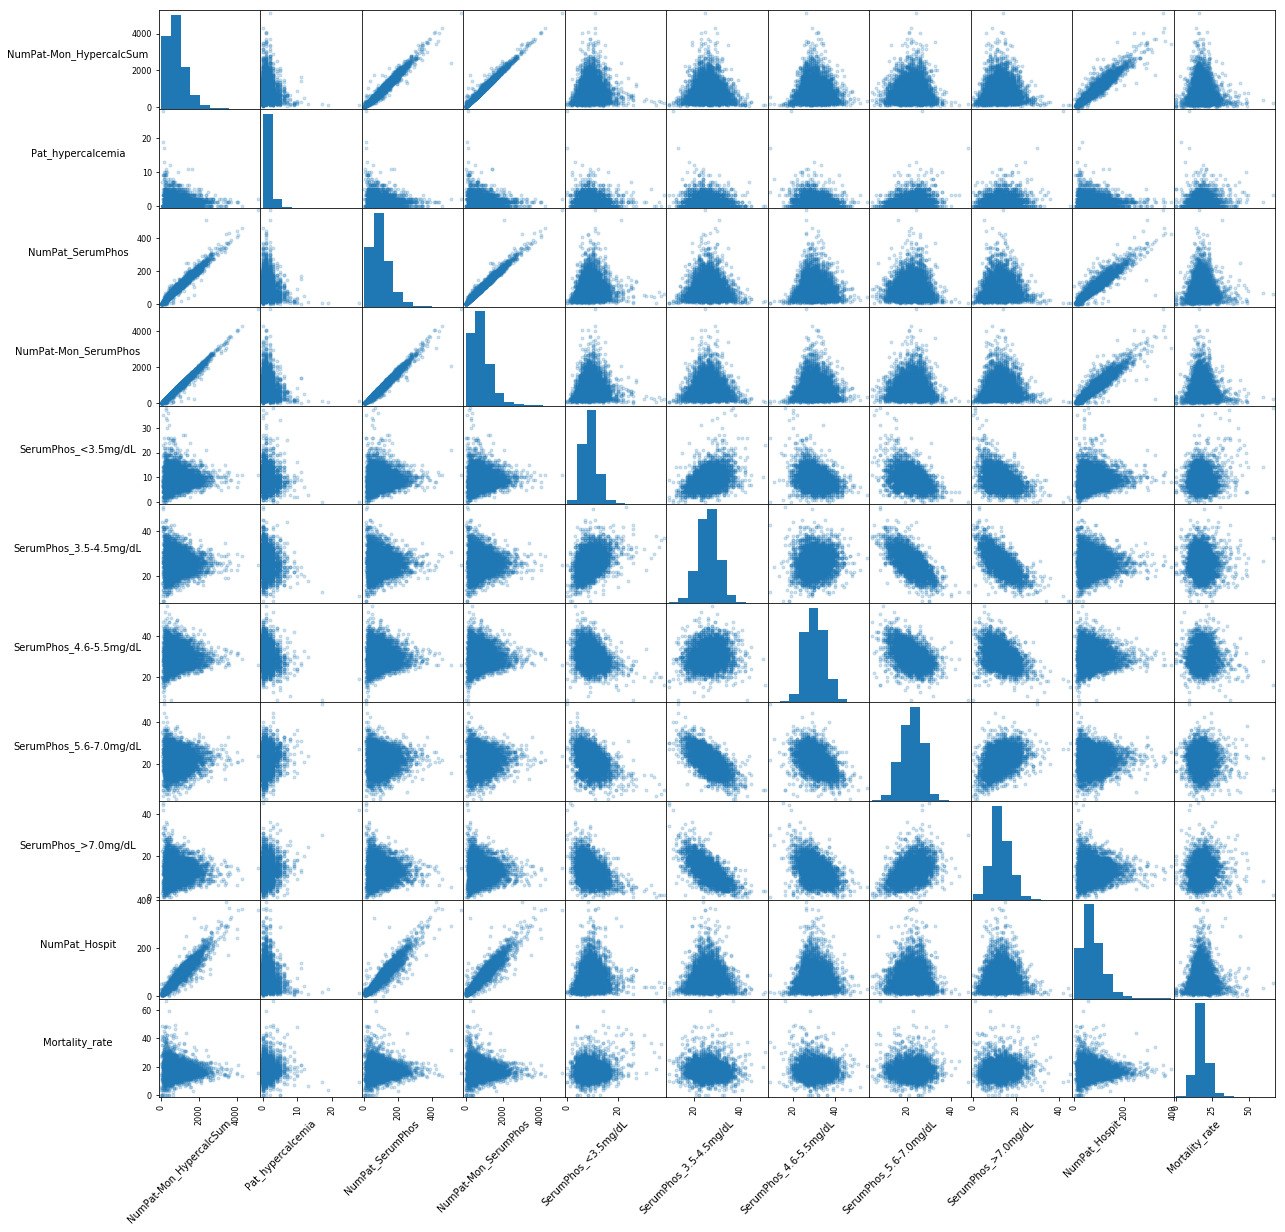

In [20]:
test3 = mortality_na.iloc[:, np.r_[29:39,49]]
test3 = scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist')

#Change label rotation
[ax.xaxis.label.set_rotation(45) for ax in test3.reshape(-1)]
[ax.yaxis.label.set_rotation(0) for ax in test3.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[ax.get_yaxis().set_label_coords(-0.8,0.5) for ax in test3.reshape(-1)]
[ax.get_xaxis().set_label_coords(0.2,-0.2) for ax in test3.reshape(-1)]


From plot-3, the only feature which shows a certain pattern against mortality rate is the percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL. The mortality rate increased with an increase in percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL. No significant trend in the mortality rate was observed with a change in the other features' values.

#### Plot-4

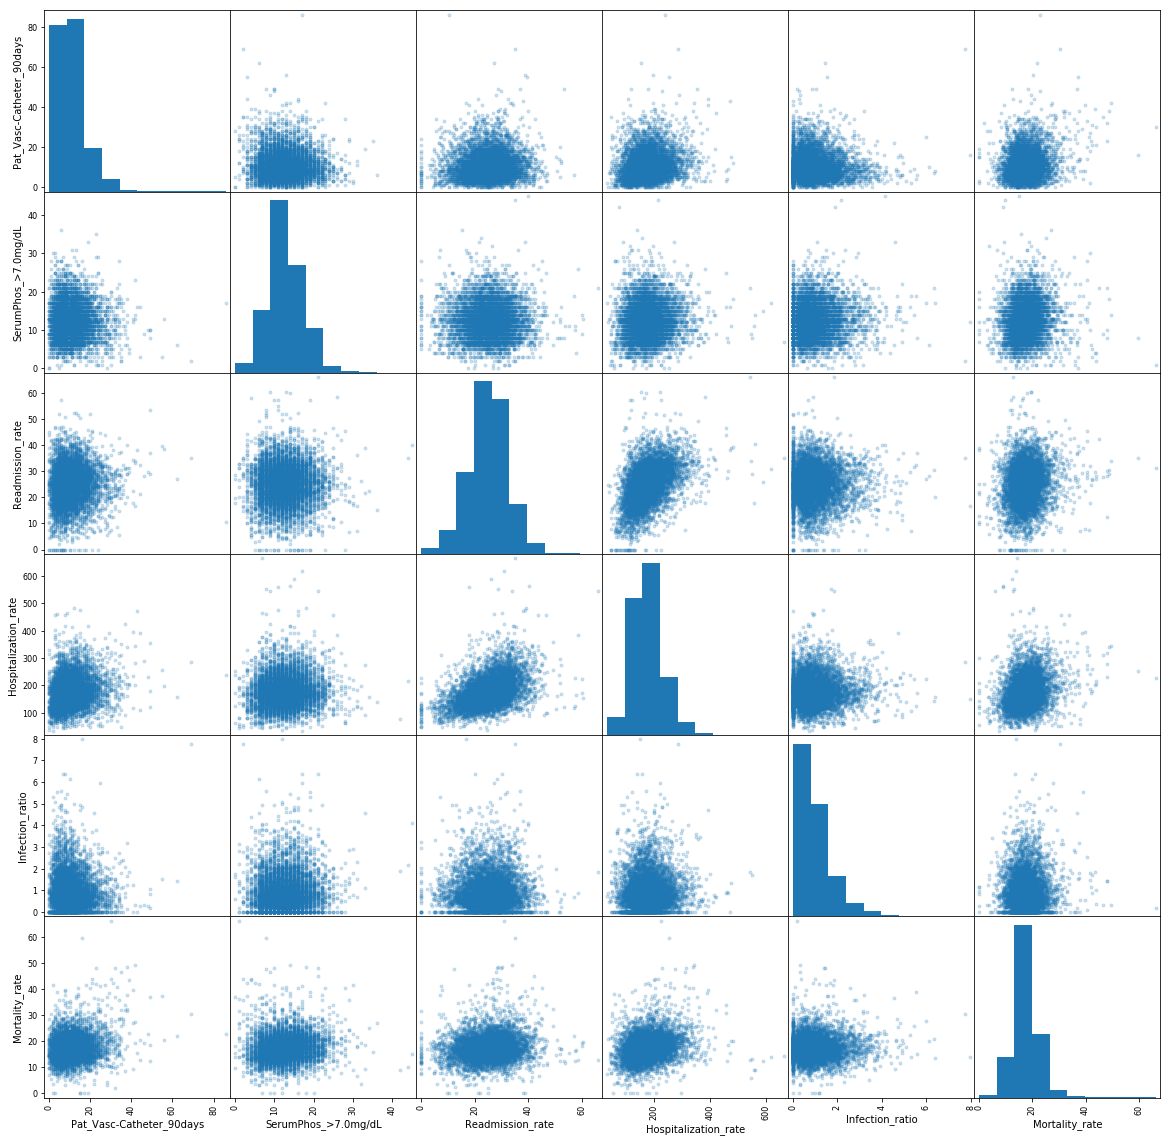

In [21]:
# Ploting the mortality rate against those features which showes some pattern/trend
relate = mortality_na.iloc[:, [25,37,41,42,47,49,50]]
relate = scatter_matrix(relate, alpha=0.2, figsize=(20, 20), diagonal='hist')

## IV) Conclusions

The mortality rate was ploted against 49 different features which are the health data of patients on dialysis. After the dataset was cleaned, it was utilized for analysis and tried to insight any pattern out of it. Based on the scatter plots, the mortality rate against many of the features did not show a strong linear relationship or have a slight pattern. Their relationships seem to be non-linear in most of them, which should be analysed further by utilizing other types of classification or regression. The features which showed a linear trend with the mortality rate include the hospitalization rate, readmission rate, tranfusion rate, infection ratio, five star,and percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL (see plot-4). It is a general truth(in most cases), the mortality rate has a positive relationship with the feature listed. The sample analysis also proved that the mortality rate increases with an increase in the values of the features listed above.